## Preparation of data:


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import re
# NLTK

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from bs4 import BeautifulSoup

# import sys
# !{sys.executable} -m pip install lxml

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sruthi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sruthi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sruthi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
questions = pd.read_csv('../data/Questions.csv', encoding = "ISO-8859-1")
answers = pd.read_csv('../data/Answers.csv', encoding = "ISO-8859-1")
tags = pd.read_csv('../data/Tags.csv', encoding = "ISO-8859-1")

In [3]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [4]:
questions.shape

(1264216, 7)

In [5]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [6]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [7]:
questions_and_answers = questions.merge(answers, left_on=['OwnerUserId','Id'], right_on = ['OwnerUserId','ParentId'], how='left')

In [8]:
questions_and_answers = questions_and_answers.rename(columns = {'Id_x': 'QID',
                           'CreationDate_x': 'QuestionCreationDate', 
                           'Score_x': 'QuestionScore', 
                           'Body_x': 'QuestionBody', 
                           'CreationDate_y': 'AnswerCreationDate', 'Score_y': 'AnswerScore', 'Body_y': 'AnswerBody'})
questions_and_answers = questions_and_answers.drop(['Id_y', 'ParentId'], axis = 1)
questions_and_answers.head()

,QID,OwnerUserId,QuestionCreationDate,ClosedDate,QuestionScore,Title,QuestionBody,AnswerCreationDate,AnswerScore,AnswerBody
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,NaN,NaN,NaN
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,NaN,NaN,NaN
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,NaN,NaN,NaN
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,2008-08-01T23:49:57Z,4.0,"<p>Yes, I thought about that, but I soon figur..."


In [9]:
questions_and_answers.shape

(1265467, 10)

In [10]:
grouped_tags = tags.groupby('Id')['Tag'].apply(list)
print(grouped_tags)

Id
80                                [flex, actionscript-3, air]
90          [svn, tortoisesvn, branch, branching-and-merging]
120                                   [sql, asp.net, sitemap]
180         [algorithm, language-agnostic, colors, color-s...
260              [c#, .net, scripting, compiler-construction]
                                  ...                        
40143210                                     [php, .htaccess]
40143300                                    [google-bigquery]
40143340                            [android, android-studio]
40143360                                 [javascript, vue.js]
40143380                                  [npm, mocha, babel]
Name: Tag, Length: 1264216, dtype: object


In [11]:
dataset_with_tags = questions_and_answers.merge(grouped_tags, left_on=['QID'], right_on=['Id'], how='inner')

In [12]:
dataset_with_tags.shape

(1265467, 11)

In [13]:
data = dataset_with_tags.copy(deep=True)
rows = data.shape[0]
cols = data.shape[1]
print(f"Rows: {rows} and Cols: {cols}")
print(f"Sample data: {data.head()}")

Rows: 1265467 and Cols: 11
Sample data:    QID  OwnerUserId  QuestionCreationDate            ClosedDate  \
0   80         26.0  2008-08-01T13:57:07Z                   NaN   
1   90         58.0  2008-08-01T14:41:24Z  2012-12-26T03:45:49Z   
2  120         83.0  2008-08-01T15:50:08Z                   NaN   
3  180    2089740.0  2008-08-01T18:42:19Z                   NaN   
4  260         91.0  2008-08-01T23:22:08Z                   NaN   

   QuestionScore                                              Title  \
0             26  SQLStatement.execute() - multiple queries in o...   
1            144  Good branching and merging tutorials for Torto...   
2             21                                  ASP.NET Site Maps   
3             53                 Function for creating color wheels   
4             49  Adding scripting functionality to .NET applica...   

                                        QuestionBody    AnswerCreationDate  \
0  <p>I've written a database generation script i...

In [14]:
print("Total no of questions:",data["QID"].nunique())

Total no of questions: 1264216


## Data Cleaning:

In [15]:
print(f"Minimum Score: {data['QuestionScore'].min()}")
print(f"Maximum Score: {data['QuestionScore'].max()}")

min_score = data['QuestionScore'].min()
max_score = data['QuestionScore'].max()

(data['QuestionScore'] >= 1).value_counts()

Minimum Score: -73
Maximum Score: 5190


False    670615
True     594852
Name: QuestionScore, dtype: int64

In [16]:
min_score = data['AnswerScore'].min()
max_score = data['AnswerScore'].max()

(data['AnswerScore'] >= 0).value_counts()

False    1137249
True      128218
Name: AnswerScore, dtype: int64

In [17]:
grouped_tags = tags.groupby(['Id', 'Tag']).size().groupby(level=1).sum().sort_values(ascending=False)
print("Count of each tag: ", grouped_tags)  # count of each tag

Count of each tag:  Tag
javascript    124155
java          115212
c#            101186
php            98808
android        90659
               ...  
tbcd               1
evil-dicom         1
evo                1
tbar               1
pjsua2             1
Length: 37034, dtype: int64


In [18]:
q = set()
for sublist in data['Tag'].values:
    q.update(sublist)
print("No of unique tags: ", len(q))

No of unique tags:  37035


In [19]:
# data = actual_data.copy(deep = True)
actual_data = data.copy(deep=True)
all_tags_list = [item for row in data['Tag'] for item in row]
tags_counts = nltk.FreqDist(all_tags_list)
_50_most_common = tags_counts.most_common(50)
most_common_tags = [tag[0] for tag in _50_most_common]
# Get the frequency counts of the 50 most common tags
tag_freq = [tags_counts[tag] for tag in most_common_tags]
print(f"Taking 50 most common - {most_common_tags}")


Taking 50 most common - ['javascript', 'java', 'c#', 'php', 'android', 'jquery', 'python', 'html', 'c++', 'ios', 'mysql', 'css', 'sql', 'asp.net', 'objective-c', 'ruby-on-rails', '.net', 'c', 'iphone', 'angularjs', 'arrays', 'sql-server', 'json', 'ruby', 'r', 'ajax', 'regex', 'xml', 'node.js', 'asp.net-mvc', 'linux', 'django', 'wpf', 'database', 'swift', 'xcode', 'string', 'excel', 'vb.net', 'windows', 'spring', 'wordpress', 'eclipse', 'html5', 'multithreading', 'oracle', 'git', 'facebook', 'forms', 'bash']


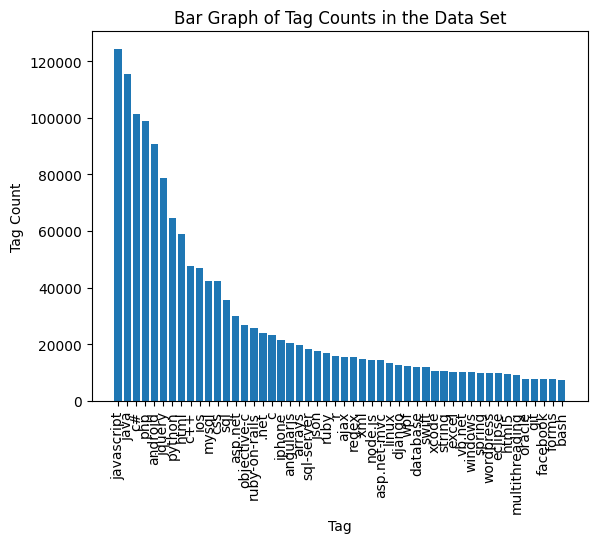

In [22]:
# Plot a bar graph of the tag frequency distribution
plt.bar(most_common_tags, tag_freq)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add axis labels and a title
plt.xlabel('Tag')
plt.ylabel('Tag Count')
plt.title('Bar Graph of Tag Counts in the Data Set')

# Show the plot
plt.show()


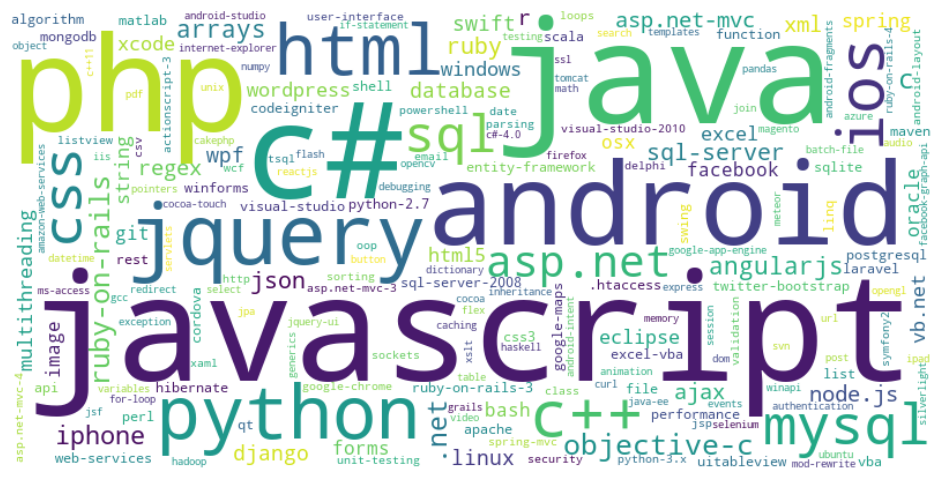

In [27]:
# Combine the tag names and their frequencies into a dictionary
tag_dict = dict(zip(most_common_tags, tag_freq))

# Create a word cloud from the tag dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(grouped_tags)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# filtering the dataset with only the most common tags
def most_common(tags):
    tags_to_send = []
    for t in tags:
        if t in most_common_tags:
            tags_to_send.append(t)
    return tags_to_send


data['Tag'] = data['Tag'].apply(lambda x: most_common(x))
data['Tag'] = data['Tag'].apply(lambda x: x if len(x) > 0 else None)
data['QuestionScore'] = data['QuestionScore'].apply(lambda x: x if x >= 3 else None)
data.dropna(subset='Tag' , inplace=True)
data.dropna(subset='QuestionScore', inplace = True)

In [22]:
data

,QID,OwnerUserId,QuestionCreationDate,ClosedDate,QuestionScore,Title,QuestionBody,AnswerCreationDate,AnswerScore,AnswerBody,Tag
2,120,83.0,2008-08-01T15:50:08Z,NaN,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,NaN,NaN,NaN,"[sql, asp.net]"
4,260,91.0,2008-08-01T23:22:08Z,NaN,49.0,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,2008-08-01T23:49:57Z,4.0,"<p>Yes, I thought about that, but I soon figur...","[c#, .net]"
5,330,63.0,2008-08-02T02:51:36Z,NaN,29.0,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,NaN,NaN,NaN,[c++]
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13.0,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,NaN,NaN,NaN,[.net]
7,580,91.0,2008-08-02T23:30:59Z,NaN,21.0,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,NaN,NaN,NaN,[sql-server]
...,...,...,...,...,...,...,...,...,...,...,...
1265074,40134650,6435187.0,2016-10-19T14:42:25Z,2016-10-19T16:35:29Z,3.0,To find the overlapping of two date ranges and...,<p>We have blocks with specific no. of date ra...,NaN,NaN,NaN,[java]
1265101,40135240,1844024.0,2016-10-19T15:06:43Z,NaN,3.0,R ggplot2: Add means as horizontal line in a b...,<p>I have created a boxplot using ggplot2:</p>...,NaN,NaN,NaN,[r]
1265107,40135400,3581788.0,2016-10-19T15:12:54Z,NaN,3.0,Get attribute's name by it's value,<p>I need to return the key with a known <code...,NaN,NaN,NaN,"[ruby-on-rails, ruby]"
1265214,40137660,4350660.0,2016-10-19T17:12:05Z,NaN,3.0,Boost intrusive pointer,<p>I'm a little confused about boost's intrusi...,NaN,NaN,NaN,[c++]


In [22]:
print("From: ", actual_data["QID"].nunique())
print("To: ", data["QID"].nunique())

From:  1264216
To:  146290


In [23]:
l = [text for text in data['AnswerBody']]
print(l[11])

nan


In [24]:
data = data.drop(columns=['AnswerCreationDate', 'ClosedDate', 'QuestionCreationDate','OwnerUserId'])

In [25]:
data

,QID,QuestionScore,Title,QuestionBody,AnswerScore,AnswerBody,Tag
2,120,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,NaN,NaN,"[sql, asp.net]"
4,260,49.0,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,4.0,"<p>Yes, I thought about that, but I soon figur...","[c#, .net]"
5,330,29.0,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,NaN,NaN,[c++]
6,470,13.0,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,NaN,NaN,[.net]
7,580,21.0,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,NaN,NaN,[sql-server]
...,...,...,...,...,...,...,...
1265074,40134650,3.0,To find the overlapping of two date ranges and...,<p>We have blocks with specific no. of date ra...,NaN,NaN,[java]
1265101,40135240,3.0,R ggplot2: Add means as horizontal line in a b...,<p>I have created a boxplot using ggplot2:</p>...,NaN,NaN,[r]
1265107,40135400,3.0,Get attribute's name by it's value,<p>I need to return the key with a known <code...,NaN,NaN,"[ruby-on-rails, ruby]"
1265214,40137660,3.0,Boost intrusive pointer,<p>I'm a little confused about boost's intrusi...,NaN,NaN,[c++]


In [70]:
data.isna().sum()

QID                   0
QuestionScore         0
Title                 0
QuestionBody          0
AnswerScore      130964
AnswerBody       130964
Tag                   0
dtype: int64

In [26]:
grouped_answers = data.groupby('QID')['AnswerBody'].apply(list)
grouped_answers

QID
120                                                     [nan]
260         [<p>Yes, I thought about that, but I soon figu...
330                                                     [nan]
470                                                     [nan]
580                                                     [nan]
                                  ...                        
40134650                                                [nan]
40135240                                                [nan]
40135400                                                [nan]
40137660                                                [nan]
40140260                                                [nan]
Name: AnswerBody, Length: 146290, dtype: object

In [27]:
grouped_answers

QID
120                                                     [nan]
260         [<p>Yes, I thought about that, but I soon figu...
330                                                     [nan]
470                                                     [nan]
580                                                     [nan]
                                  ...                        
40134650                                                [nan]
40135240                                                [nan]
40135400                                                [nan]
40137660                                                [nan]
40140260                                                [nan]
Name: AnswerBody, Length: 146290, dtype: object

In [28]:
data_with_grouped_answers = data.merge(grouped_answers, left_on=['QID'], right_on=['QID'], how='left')
data_with_grouped_answers = data_with_grouped_answers.drop(columns=['AnswerBody_x'])

In [29]:
c = 0
for x in grouped_answers:
    if len(x) != 1 and pd.notna(x)[0]:
        c += 1
print('Total no of questions with answers: ', c)

Total no of questions with answers:  237


In [30]:
data.isna().sum()

data_with_grouped_answers.isna().sum() # This many null values are in the answer body

QID                   0
QuestionScore         0
Title                 0
QuestionBody          0
AnswerScore      130964
Tag                   0
AnswerBody_y          0
dtype: int64

In [31]:
data_with_grouped_answers

,QID,QuestionScore,Title,QuestionBody,AnswerScore,Tag,AnswerBody_y
0,120,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,NaN,"[sql, asp.net]",[nan]
1,260,49.0,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,4.0,"[c#, .net]","[<p>Yes, I thought about that, but I soon figu..."
2,330,29.0,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,NaN,[c++],[nan]
3,470,13.0,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,NaN,[.net],[nan]
4,580,21.0,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,NaN,[sql-server],[nan]
...,...,...,...,...,...,...,...
146590,40134650,3.0,To find the overlapping of two date ranges and...,<p>We have blocks with specific no. of date ra...,NaN,[java],[nan]
146591,40135240,3.0,R ggplot2: Add means as horizontal line in a b...,<p>I have created a boxplot using ggplot2:</p>...,NaN,[r],[nan]
146592,40135400,3.0,Get attribute's name by it's value,<p>I need to return the key with a known <code...,NaN,"[ruby-on-rails, ruby]",[nan]
146593,40137660,3.0,Boost intrusive pointer,<p>I'm a little confused about boost's intrusi...,NaN,[c++],[nan]


In [32]:
mask = pd.Series([np.nan not in lst for lst in data_with_grouped_answers.AnswerBody_y])
mask = mask[mask == True]
mask = mask.index.values.tolist()

data_with_grouped_answers['AnswerBody_y'] = data_with_grouped_answers.AnswerBody_y.str.join(sep=' ')

In [33]:
print(data_with_grouped_answers)

             QID  QuestionScore  \
0            120           21.0   
1            260           49.0   
2            330           29.0   
3            470           13.0   
4            580           21.0   
...          ...            ...   
146590  40134650            3.0   
146591  40135240            3.0   
146592  40135400            3.0   
146593  40137660            3.0   
146594  40140260            3.0   

                                                    Title  \
0                                       ASP.NET Site Maps   
1       Adding scripting functionality to .NET applica...   
2               Should I use nested classes in this case?   
3                   Homegrown consumption of web services   
4        Deploying SQL Server Databases from Test to Live   
...                                                   ...   
146590  To find the overlapping of two date ranges and...   
146591  R ggplot2: Add means as horizontal line in a b...   
146592                 Get att

In [34]:


data_with_grouped_answers['QuestionBody'].iloc[mask]  = data_with_grouped_answers['QuestionBody'].iloc[mask] + " " + data_with_grouped_answers['AnswerBody_y'].iloc[mask]



/var/folders/z9/336qkncn48l4v8c1qftlly8r0000gn/T/ipykernel_36620/2841134462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_grouped_answers['QuestionBody'].iloc[mask]  = data_with_grouped_answers['QuestionBody'].iloc[mask] + " " + data_with_grouped_answers['AnswerBody_y'].iloc[mask]


In [35]:
data_with_grouped_answers = data_with_grouped_answers.drop(columns=['AnswerBody_y', 'AnswerScore'])

In [71]:
data_with_grouped_answers.isna().sum()

QID              0
QuestionScore    0
Title            0
Body             0
Tag              0
dtype: int64

In [36]:
data_with_grouped_answers.isna().sum() # This many null values are in the body
data_with_grouped_answers = data_with_grouped_answers.rename(columns = {'QuestionBody': 'Body'})
data_with_grouped_answers

,QID,QuestionScore,Title,Body,Tag
0,120,21.0,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
1,260,49.0,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"
2,330,29.0,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,[c++]
3,470,13.0,Homegrown consumption of web services,<p>I've been writing a few web services for a ...,[.net]
4,580,21.0,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...,[sql-server]
...,...,...,...,...,...
146590,40134650,3.0,To find the overlapping of two date ranges and...,<p>We have blocks with specific no. of date ra...,[java]
146591,40135240,3.0,R ggplot2: Add means as horizontal line in a b...,<p>I have created a boxplot using ggplot2:</p>...,[r]
146592,40135400,3.0,Get attribute's name by it's value,<p>I need to return the key with a known <code...,"[ruby-on-rails, ruby]"
146593,40137660,3.0,Boost intrusive pointer,<p>I'm a little confused about boost's intrusi...,[c++]


In [37]:
# Converting html to text in the body

data_with_grouped_answers['Body'] = [BeautifulSoup(text).get_text() for text in data_with_grouped_answers['Body'] ]

In [38]:
print(data_with_grouped_answers)
print(data_with_grouped_answers.isna().sum())

             QID  QuestionScore  \
0            120           21.0   
1            260           49.0   
2            330           29.0   
3            470           13.0   
4            580           21.0   
...          ...            ...   
146590  40134650            3.0   
146591  40135240            3.0   
146592  40135400            3.0   
146593  40137660            3.0   
146594  40140260            3.0   

                                                    Title  \
0                                       ASP.NET Site Maps   
1       Adding scripting functionality to .NET applica...   
2               Should I use nested classes in this case?   
3                   Homegrown consumption of web services   
4        Deploying SQL Server Databases from Test to Live   
...                                                   ...   
146590  To find the overlapping of two date ranges and...   
146591  R ggplot2: Add means as horizontal line in a b...   
146592                 Get att

In [39]:
token = ToktokTokenizer()
punct = '!"$%&\'#()*+,./:;<=>?@[\\]^_`{|}~'
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


def clean_text(text):
    text = text.lower()
    text = text.strip(' ')
    return text

def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

def clean_punct(text): 
    words = token.tokenize(text)
    tokens = [token for token in words if not re.match(re.compile('[%s]' % re.escape(punct)), token)]
    filtered_list = strip_list_noempty(tokens)
    return ' '.join(map(str, filtered_list))

def lemmatizeWords(text):
    words = token.tokenize(text)
    listLemma = []
    for w in words:
        x = lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [40]:
new_question_df = data_with_grouped_answers.copy(deep=True)

In [41]:
# Remove stopwords, punctuation and lemmatize for text in body
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: clean_text(x)) 
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: clean_punct(x)) 
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: lemmatizeWords(x))
new_question_df['Body'] = new_question_df['Body'].apply(lambda x: stopWordsRemove(x))

# Remove stopwords, punctuation and lemmatize for title.
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: str(x))
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: clean_text(x)) 
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: clean_punct(x)) 
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: lemmatizeWords(x)) 
new_question_df['Title'] = new_question_df['Title'].apply(lambda x: stopWordsRemove(x))

In [45]:
merged_df = new_question_df.copy(deep=True)

In [50]:
merged_df.drop(columns=['QID', 'QuestionScore'], inplace=True)
merged_df

,Title,Body,Tag
0,asp.net site map,anyone get experience create sql-based asp.net...,"[sql, asp.net]"
1,add script functionality applications,little game write c#. use database back-end. t...,"[c#, .net]"
2,use nest class case,work collection class use video playback recor...,[c++]
3,homegrown consumption web service,write web service app ready consume them. see ...,[.net]
4,deploy sql server databases test live,wonder guy manage deployment database 2 sql se...,[sql-server]
...,...,...,...
146590,find overlap two date range merge one date ran...,block specific no. date range require merge da...,[java]
146591,r ggplot2 add mean horizontal line boxplot,create boxplot use ggplot2 library( ggplot2 da...,[r]
146592,get attribute name value,need return key know value model. f foo.find_b...,"[ruby-on-rails, ruby]"
146593,boost intrusive pointer,little confuse boost intrusive pointer. defini...,[c++]


In [72]:
merged_df.isna().sum()

Title            0
Body             0
Tag              0
Combined_text    0
dtype: int64

In [54]:
merged_df['Combined_text'] = merged_df['Title'] + ' ' + merged_df['Body']

## EDA: 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from scipy. sparse import hstack

In [51]:
no_topics = 20

In [55]:
X1 = merged_df['Body']
X2 = merged_df['Title']
y = merged_df['Tag']
XC3 = merged_df['Combined_text']

In [56]:
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [57]:

X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)
XC3_tfidf = vectorizer_X1.fit_transform(XC3)


In [74]:
print(X1_tfidf)

  (0, 971)	0.17651174659901914
  (0, 869)	0.18689556510690633
  (0, 835)	0.20617758601004357
  (0, 959)	0.16231728422059052
  (0, 641)	0.31199282617933627
  (0, 583)	0.20444792571402862
  (0, 809)	0.20538286880580386
  (0, 939)	0.19661989318243422
  (0, 967)	0.10598264415876377
  (0, 598)	0.22138412708866634
  (0, 221)	0.195999884404645
  (0, 572)	0.23505478536364355
  (0, 702)	0.22154802059628562
  (0, 986)	0.0972003398234472
  (0, 365)	0.11851005771716885
  (0, 995)	0.2051773852759603
  (0, 255)	0.17156373711371223
  (0, 96)	0.4331556189862451
  (0, 235)	0.2355235347802274
  (0, 346)	0.22467566060920738
  (0, 410)	0.17591880641069044
  (0, 72)	0.15012649869505626
  (1, 781)	0.11004386306954739
  (1, 40)	0.07539371424816668
  (1, 529)	0.09774204524928198
  :	:
  (146594, 885)	0.10761734484262178
  (146594, 309)	0.40597363778000095
  (146594, 452)	0.17407490263953332
  (146594, 670)	0.15129701654264535
  (146594, 760)	0.14401941295390025
  (146594, 433)	0.12259491148799143
  (146594, 7

## LDA for Body

In [58]:
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(X1_tfidf)

In [59]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")
        

no_top_words = 10
display_topics(lda, vectorizer_X1.get_feature_names_out(), no_top_words)

--------------------------------------------
Topic 0:
fetch project err rule usage version bundle install -- command
--------------------------------------------
--------------------------------------------
Topic 1:
apple usage dictionary apply server. appear useful go extra generate
--------------------------------------------
--------------------------------------------
Topic 2:
animation name= node xml learn layout_width= match_parent 10 wrap_content id=
--------------------------------------------
--------------------------------------------
Topic 3:
var func class= full type id= console.log( value= name= html
--------------------------------------------
--------------------------------------------
Topic 4:
represent separate generic usage fetch err pass generate print( uri
--------------------------------------------
--------------------------------------------
Topic 5:
status int const c++ char create printf( main( vector void
--------------------------------------------
--------

## Data Preparation


In [61]:
X_1 = merged_df['Body']
X_2 = merged_df['Title']
y_label = merged_df['Tag']
X_C3 = merged_df['Combined_text']

multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [62]:
y_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [63]:
vectorizer_X_1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X_2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [64]:
X_1_tfidf = vectorizer_X_1.fit_transform(X_1)
X_2_tfidf = vectorizer_X_2.fit_transform(X_2)
X_C3_tfidf = vectorizer_X_1.fit_transform(X_C3)
X_tfidf = hstack([X_1_tfidf,X_2_tfidf])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0) # Do 80/20 split

In [66]:
print("X train shape", X_train.shape)
print("y train shape", y_train.shape)
print("X test shape", X_test.shape)
print("y test shape", y_test.shape)

X train shape (117276, 2000)
y train shape (117276, 50)
X test shape (29319, 2000)
y test shape (29319, 50)


## Classification and Prediction

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer,hamming_loss,confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans

In [69]:
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
prec_dict = {}
hamloss_dict = {}
for classi in [sgd, lr, mn, svc]:
    clf = OneVsRestClassifier(classi)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    ham = hamming_loss(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    clsnam = classi.__class__.__name__
    prec_dict[clsnam] = prec
    hamloss_dict[clsnam] = ham
    print('Classifier: ', clsnam)
    print("Hamming Loss: ", ham)
    print('Precision: ', prec)
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print('\n\n')

/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier:  SGDClassifier
Hamming Loss:  0.016466455199699852
Precision:  0.843511958744829
Recall:  0.47758293952551156





/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sruthi/anaconda3/envs/testenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Classifier:  LogisticRegression
Hamming Loss:  0.01573109587639415
Precision:  0.8214314656602885
Recall:  0.5476287571665027



Classifier:  MultinomialNB
Hamming Loss:  0.020144616119240084
Precision:  0.7174022401419899
Recall:  0.5096073116319236



Classifier:  LinearSVC
Hamming Loss:  0.01539343088099867
Precision:  0.8216109600157442
Recall:  0.5608942835896082



